# All oscillation analysis

Brief 1-2 sentence description of notebook.

In [1]:
# Imports of all used packages and libraries
import sys
import os
import git
import glob
from collections import defaultdict

In [2]:
git_repo = git.Repo(".", search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

In [3]:
git_root

'/blue/npadillacoreano/ryoi360/projects/reward_comp/repos/reward_competition_extention'

In [4]:
sys.path.insert(0, os.path.join(git_root, 'src'))

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
import collections
import itertools
from collections import defaultdict
from itertools import combinations
from itertools import product

In [7]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu


In [8]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import colorsys

In [9]:
import utilities.helper
import trodes.read_exported

In [10]:
FONTSIZE = 20

In [11]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

## Inputs & Data

Explanation of each input and where it comes from.

In [12]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [13]:
LFP_SPECTRAL_DF = pd.read_pickle("../2024_01_30_rce2_spectral_preprocessing/proc/rce_pilot_2_10_per_trial_spectral_bans_sleap.pkl")

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [14]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [15]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [16]:
LFP_SPECTRAL_DF.columns

Index(['tracked_subject', 'box_number', 'sleap_name', 'video_name',
       'current_subject', 'tone_start_frame', 'reward_start_frame',
       'tone_stop_frame', 'condition', 'competition_closeness',
       ...
       'baseline_subject_thorax_to_reward_port',
       'baseline_subject_thorax_velocity', 'baseline_video_timestamps',
       'trial_agent_locations', 'trial_agent_thorax_to_reward_port',
       'trial_agent_thorax_velocity', 'trial_subject_locations',
       'trial_subject_thorax_to_reward_port', 'trial_subject_thorax_velocity',
       'trial_video_timestamps'],
      dtype='object', length=275)

## Power plots

In [17]:
LFP_SPECTRAL_DF["trial_label"].head()

0     win
1    lose
2    lose
3    lose
4    lose
Name: trial_label, dtype: object

In [18]:
LFP_SPECTRAL_DF["experiment"].head()

0    standard
1    standard
2    standard
3    standard
4    standard
Name: experiment, dtype: object

In [19]:
LFP_SPECTRAL_DF["experiment_and_label"] = LFP_SPECTRAL_DF.apply(lambda x: "{}_{}".format(x["experiment"], x["trial_label"]) if x["experiment"] != x["trial_label"] else x["experiment"], axis=1)

In [20]:
LFP_SPECTRAL_DF["experiment_and_label"] = LFP_SPECTRAL_DF["experiment_and_label"].apply(lambda x: x.replace("omission_rewarded", "alone_rewarded").replace("standard_rewarded", "alone_rewarded").replace("standard", "").strip("_"))

In [21]:
LFP_SPECTRAL_DF["experiment_and_label"].unique()

array(['win', 'lose', 'alone_rewarded', 'omission', 'both_rewarded',
       'novel_lose', 'novel_win'], dtype=object)

In [22]:
spectral_columns = set([col.replace("baseline_", "").replace("trial_", "") for col in LFP_SPECTRAL_DF.columns if ("gamma" in col or "theta" in col) and "frequencies" not in col and "timestamps" not in col])

In [23]:
spectral_columns

{'BLA-to-LH_granger_gamma',
 'BLA-to-LH_granger_theta',
 'BLA-to-MD_granger_gamma',
 'BLA-to-MD_granger_theta',
 'BLA-to-mPFC_granger_gamma',
 'BLA-to-mPFC_granger_theta',
 'BLA-to-vHPC_granger_gamma',
 'BLA-to-vHPC_granger_theta',
 'BLA_LH_coherence_gamma',
 'BLA_LH_coherence_theta',
 'BLA_MD_coherence_gamma',
 'BLA_MD_coherence_theta',
 'BLA_mPFC_coherence_gamma',
 'BLA_mPFC_coherence_theta',
 'BLA_power_gamma',
 'BLA_power_theta',
 'BLA_vHPC_coherence_gamma',
 'BLA_vHPC_coherence_theta',
 'LH-to-BLA_granger_gamma',
 'LH-to-BLA_granger_theta',
 'LH-to-MD_granger_gamma',
 'LH-to-MD_granger_theta',
 'LH-to-mPFC_granger_gamma',
 'LH-to-mPFC_granger_theta',
 'LH-to-vHPC_granger_gamma',
 'LH-to-vHPC_granger_theta',
 'LH_MD_coherence_gamma',
 'LH_MD_coherence_theta',
 'LH_mPFC_coherence_gamma',
 'LH_mPFC_coherence_theta',
 'LH_power_gamma',
 'LH_power_theta',
 'LH_vHPC_coherence_gamma',
 'LH_vHPC_coherence_theta',
 'MD-to-BLA_granger_gamma',
 'MD-to-BLA_granger_theta',
 'MD-to-LH_granger_g

In [24]:
OUTCOME_TO_COLOR = {"both_rewarded": "green", 
"novel_lose": "#e67073",
"novel_win": "#93a5da",
"lose": "#951a1d",
"alone_rewarded": "#0499af",
"win": "#3853a3",
"omission": "orange"}

In [25]:
spectral_band_to_ylim = {"power": {"gamma": (-0.0002, 0.0002), "theta": (-0.005, 0.005)}, "coherence": {"gamma": (-0.025, 0.025), "theta": (-0.04, 0.04)}, "granger": {"gamma": (-0.03, 0.03), "theta": (-0.06, 0.06)}}


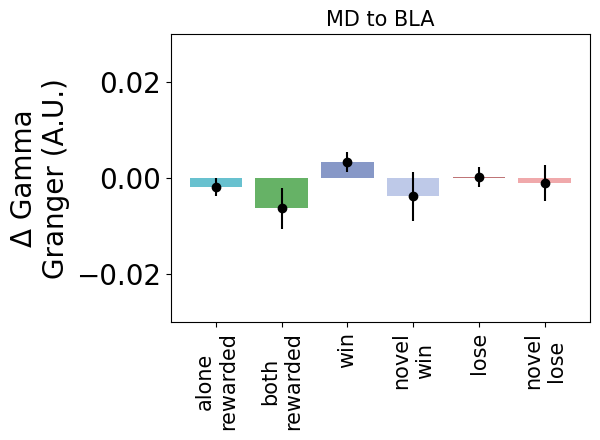

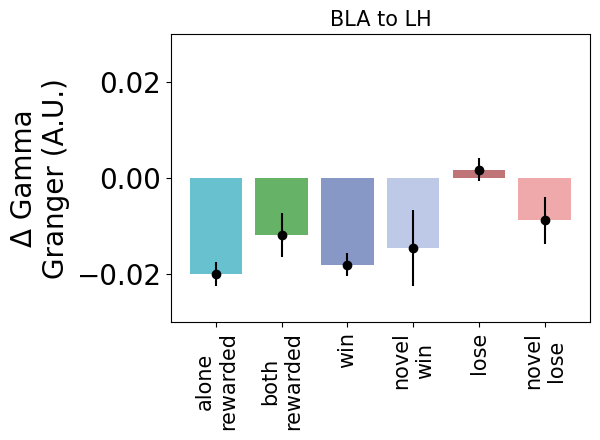

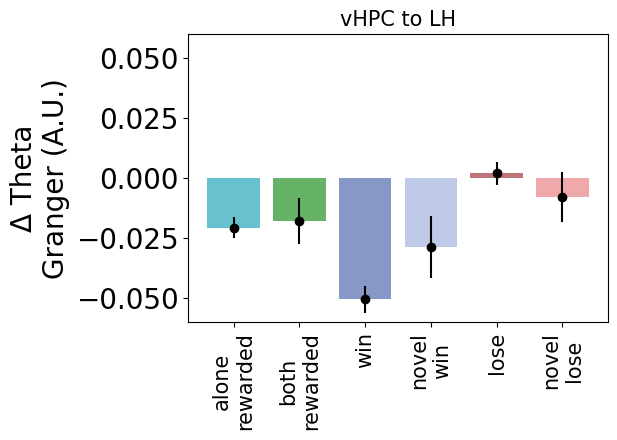

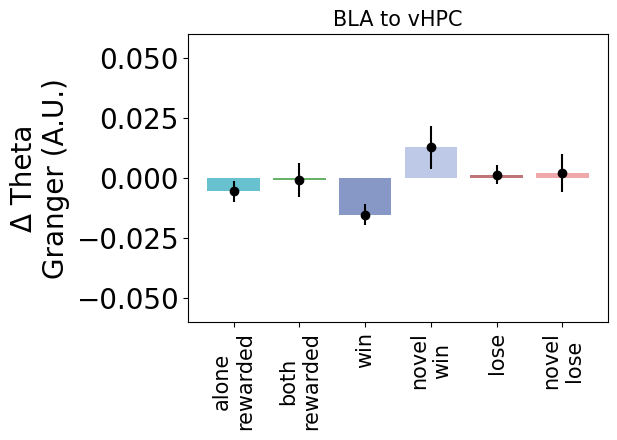

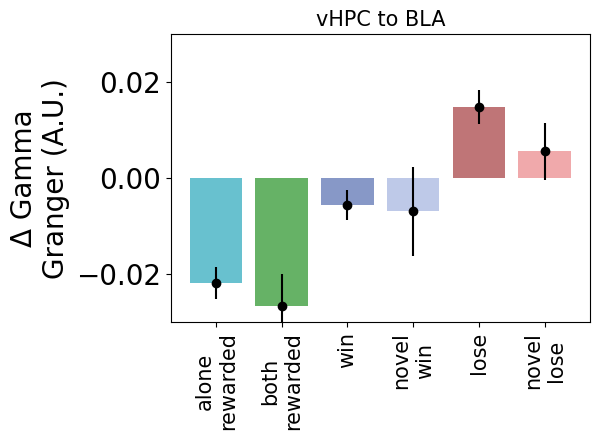

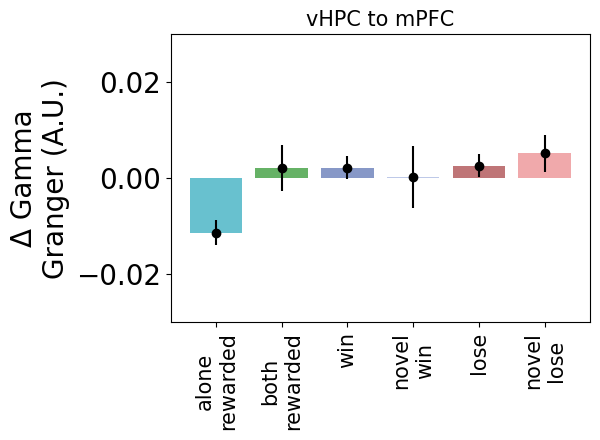

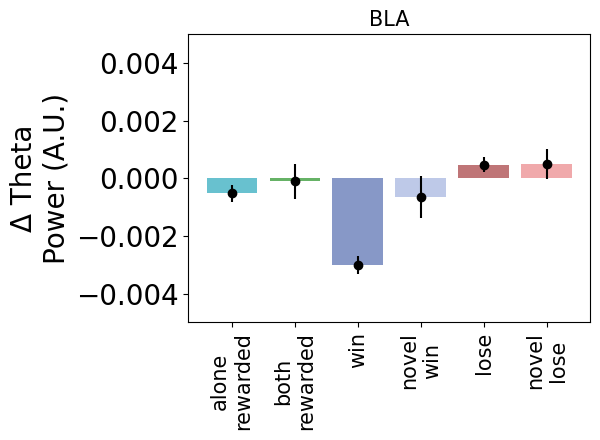

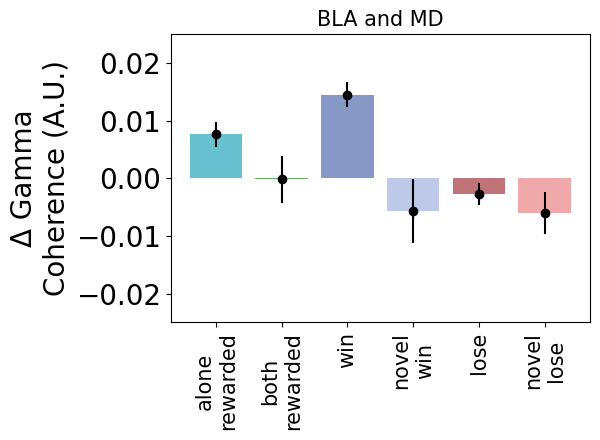

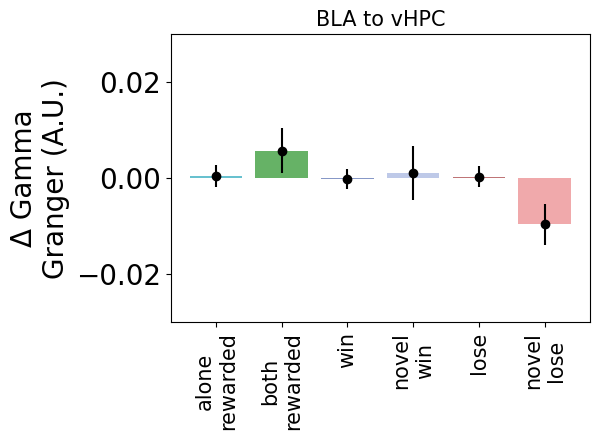

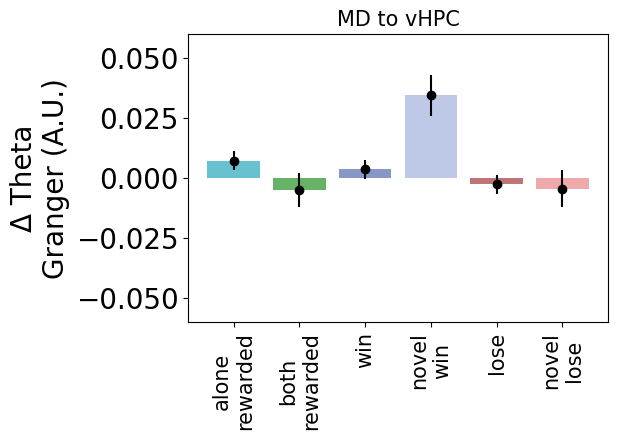

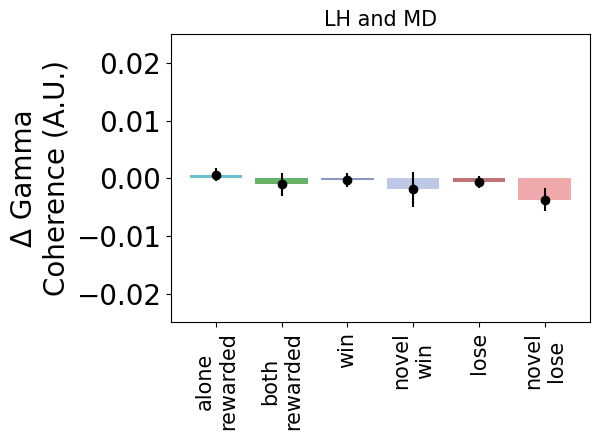

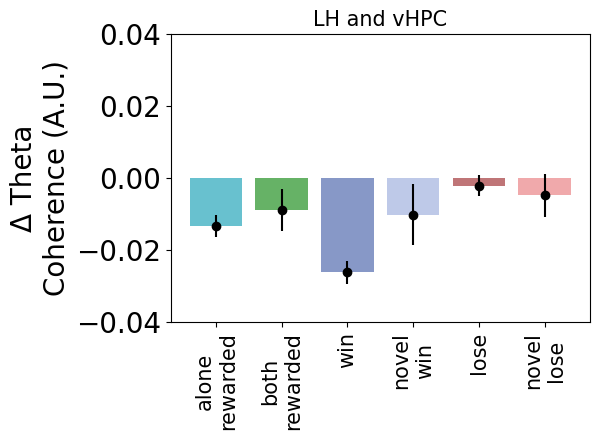

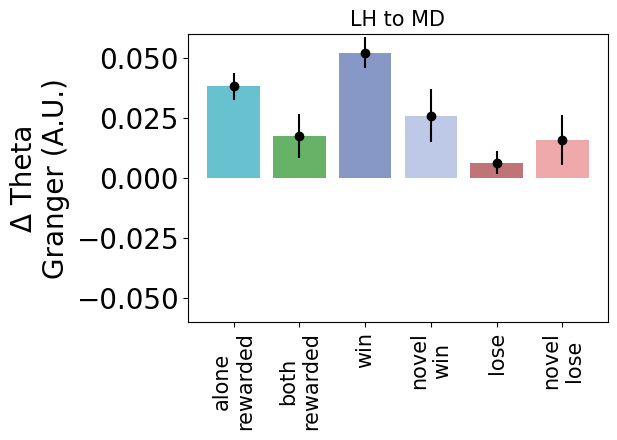

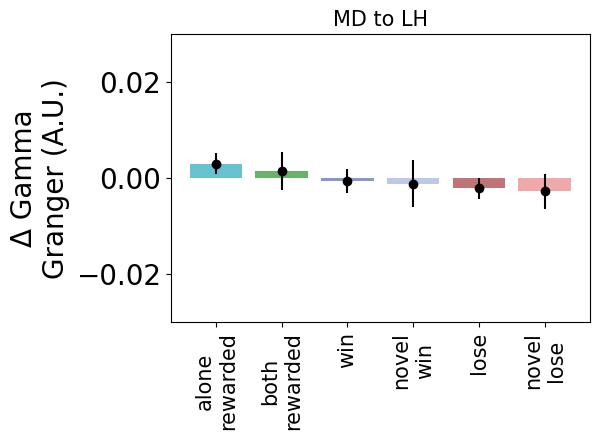

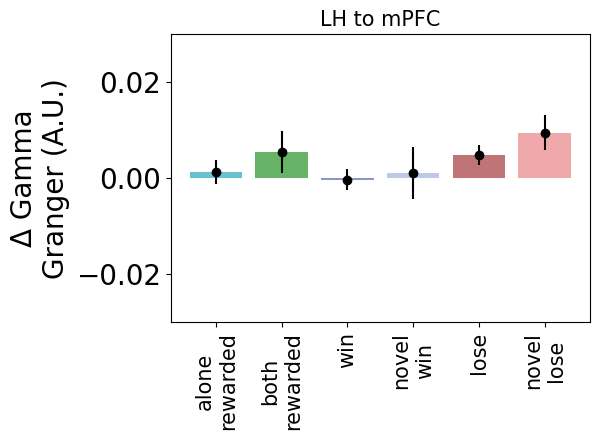

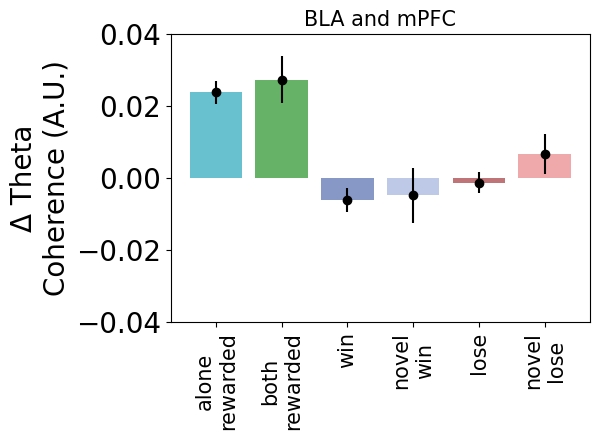

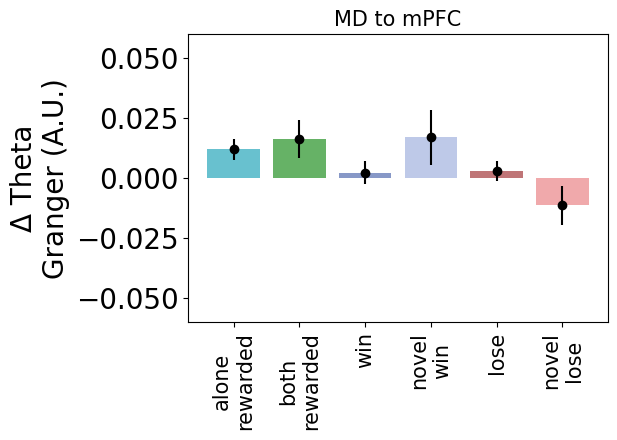

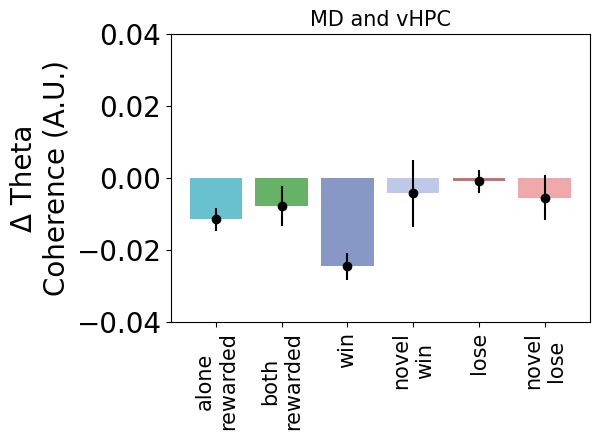

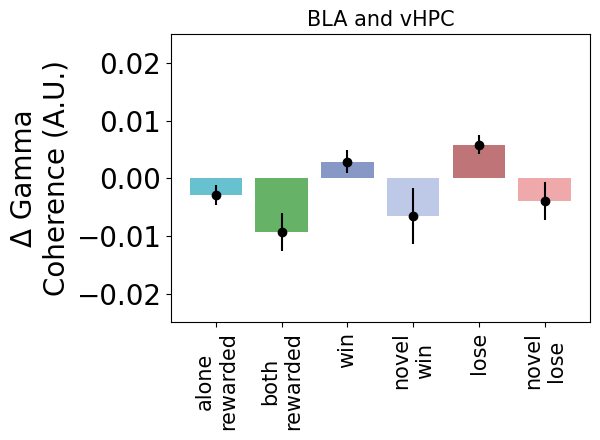

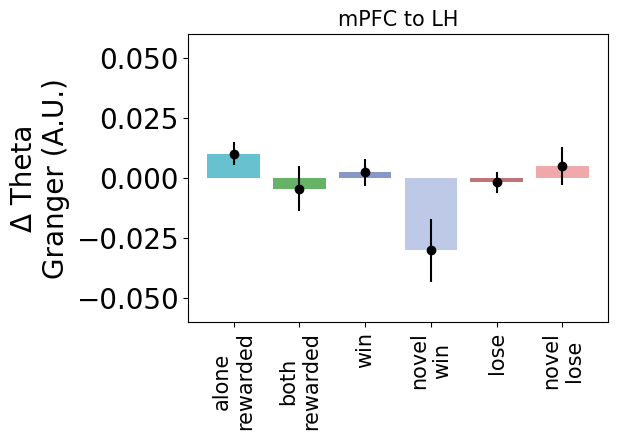

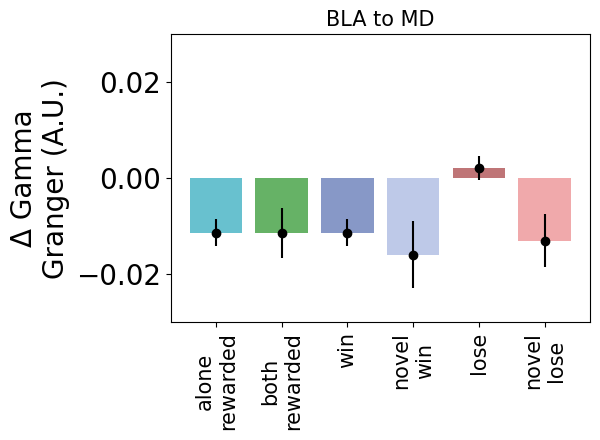

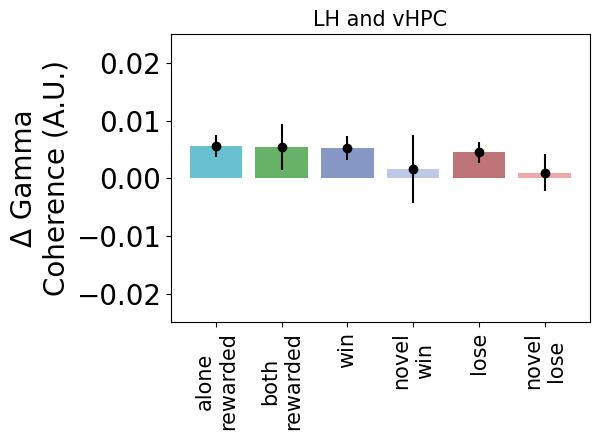

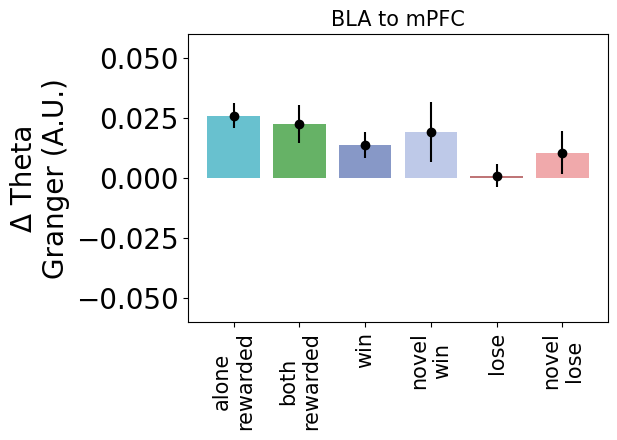

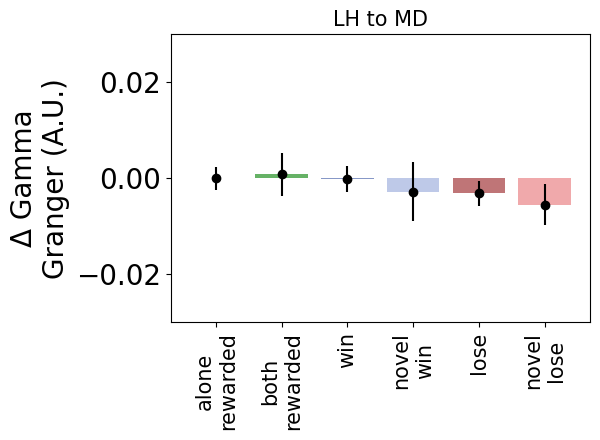

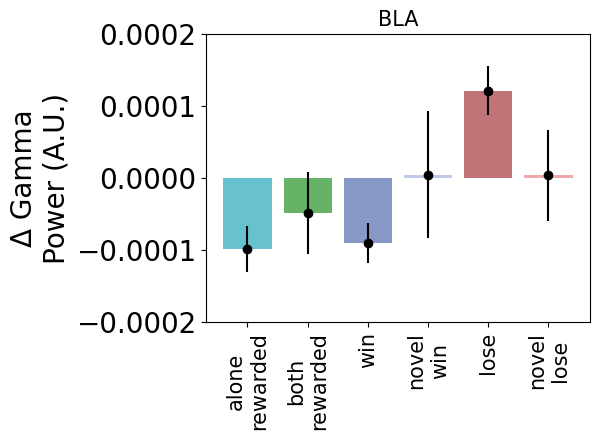

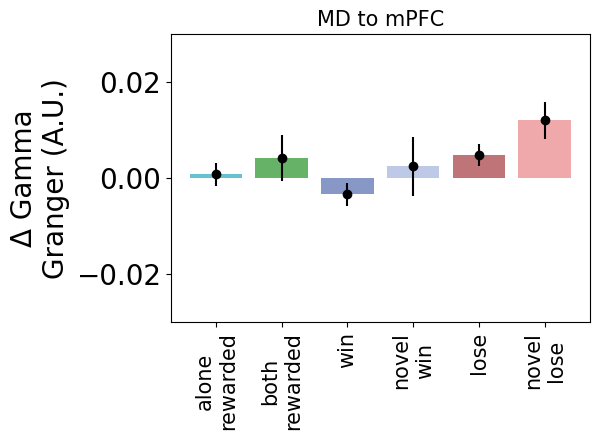

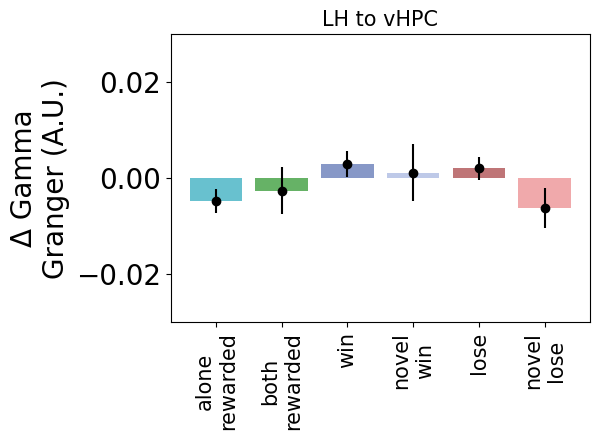

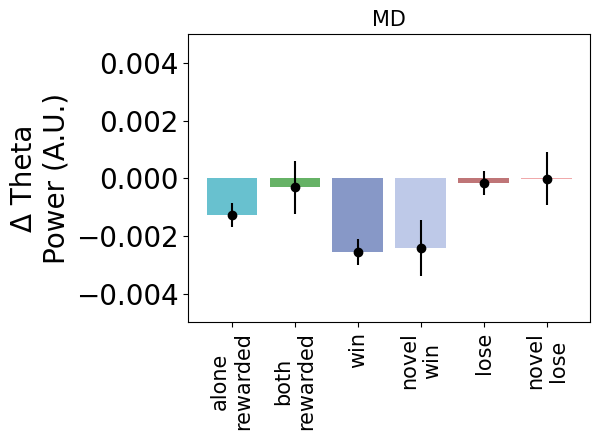

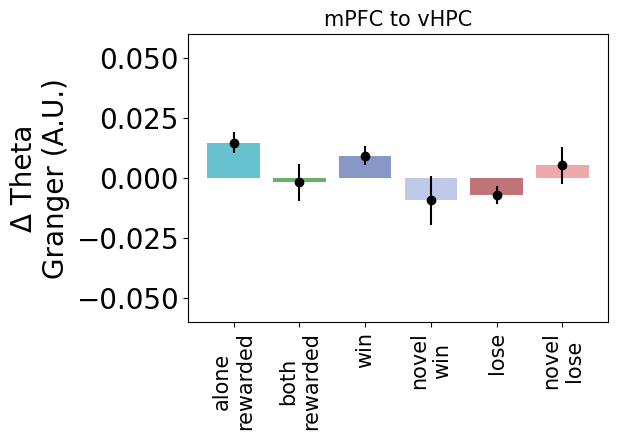

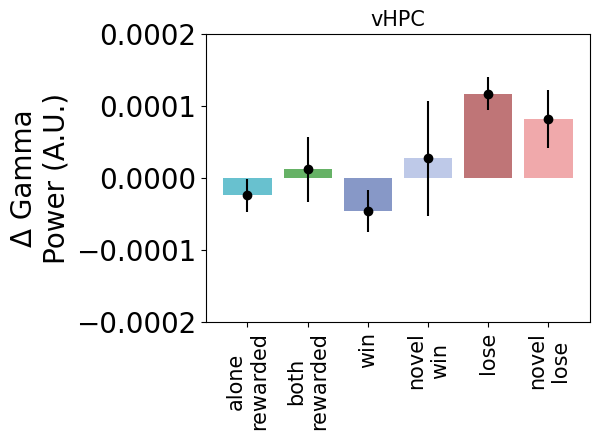

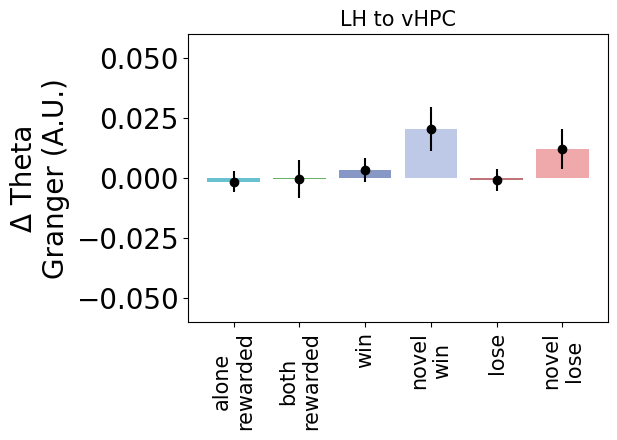

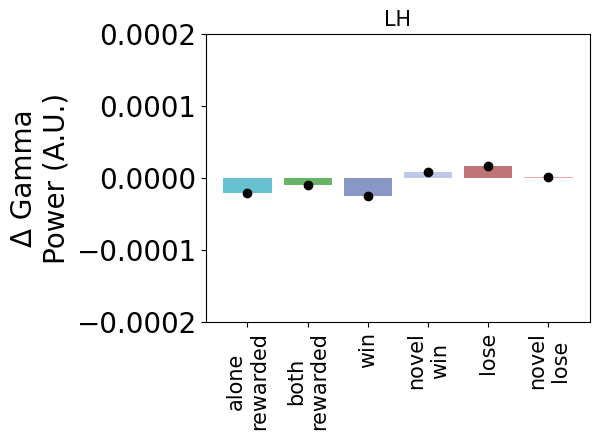

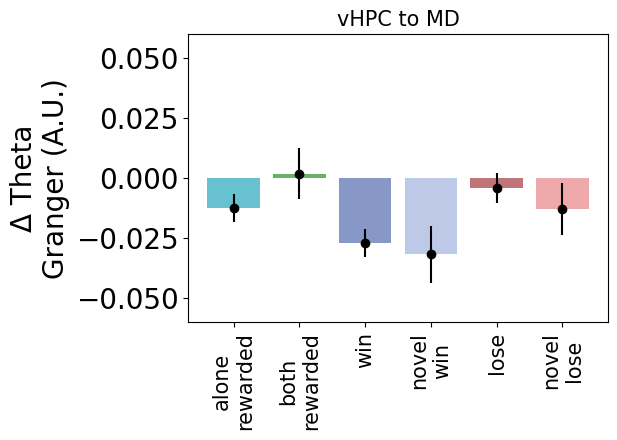

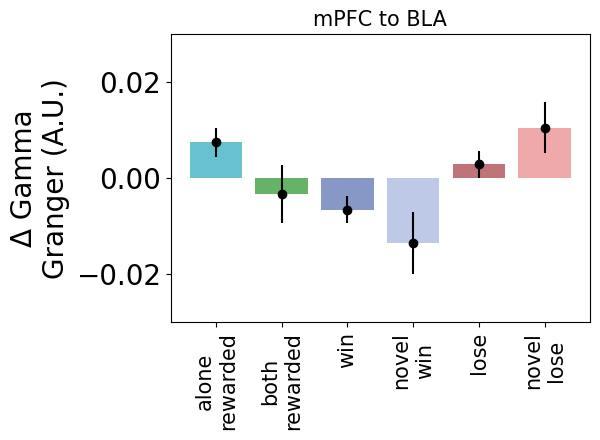

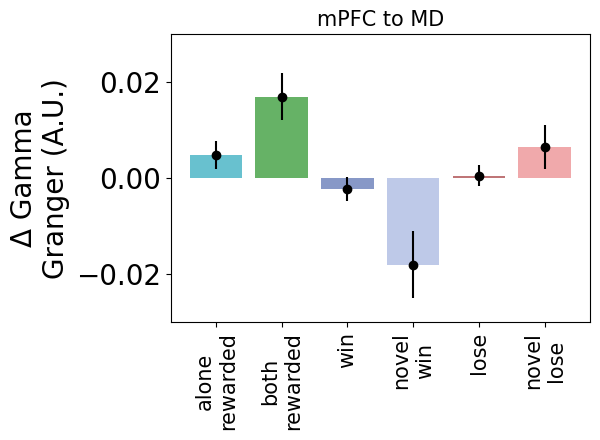

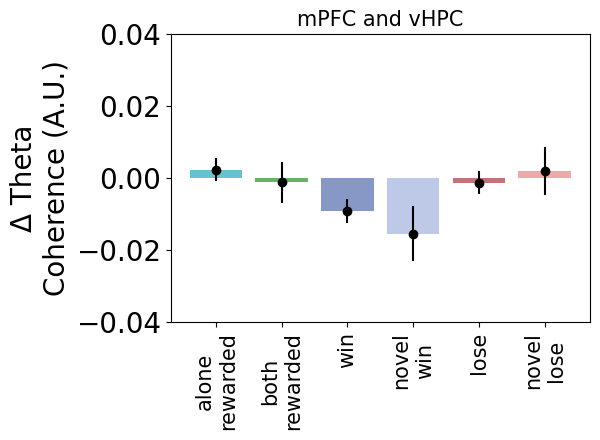

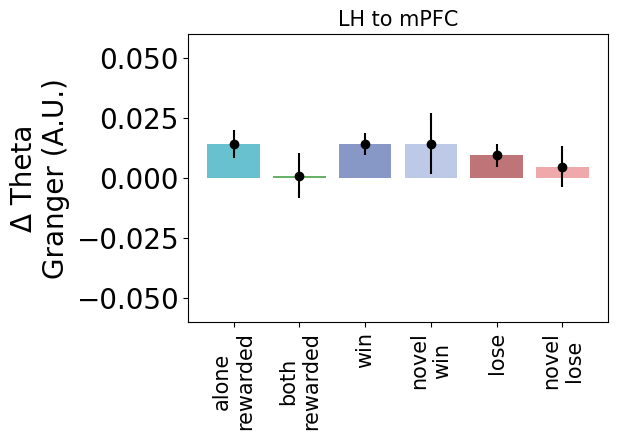

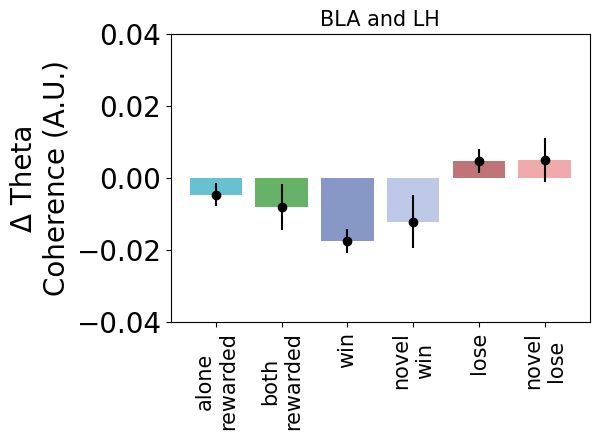

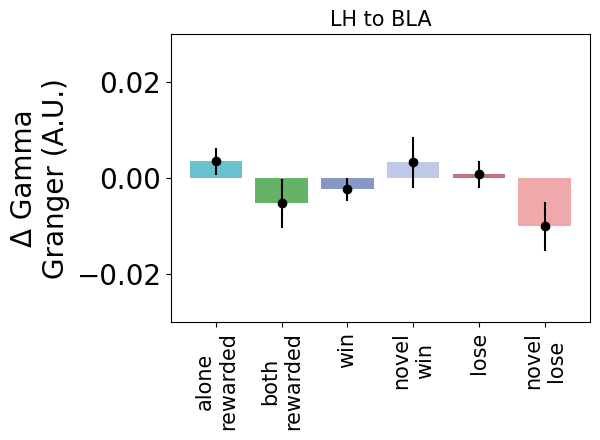

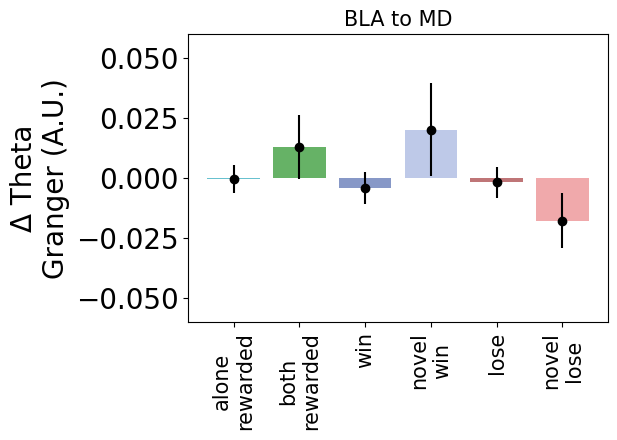

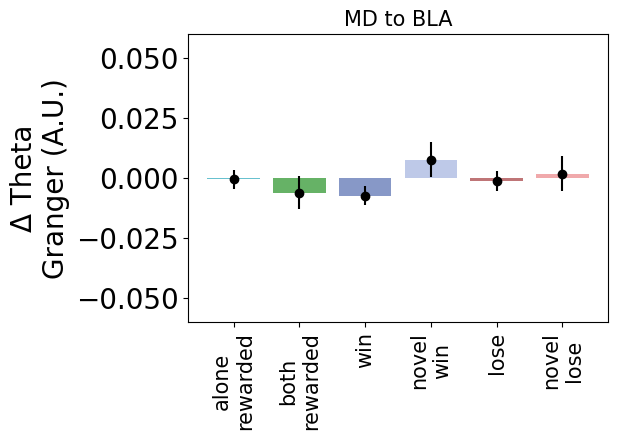

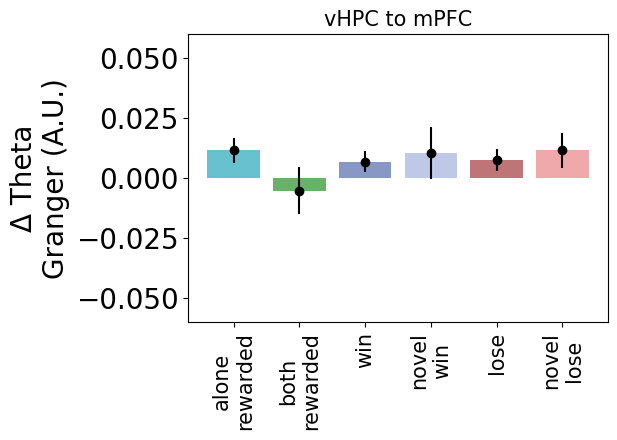

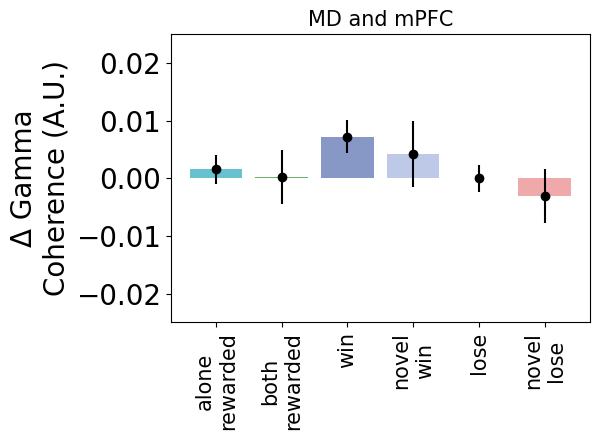

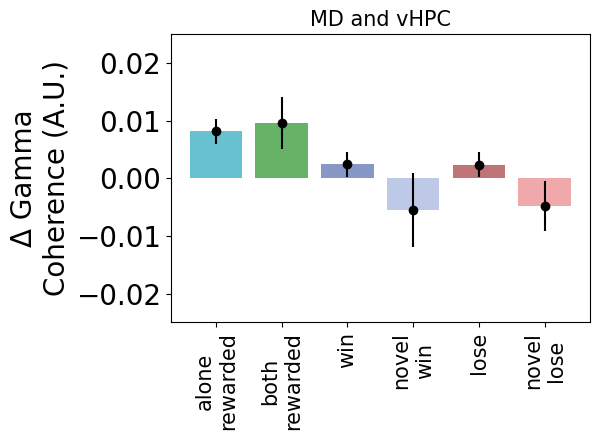

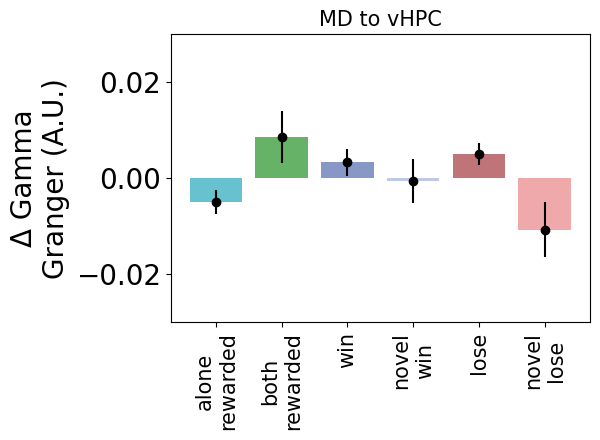

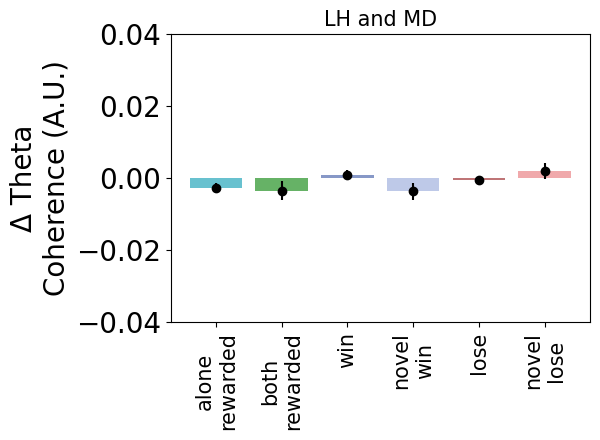

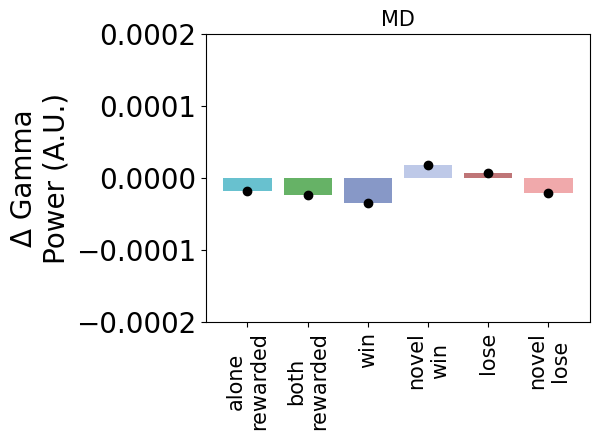

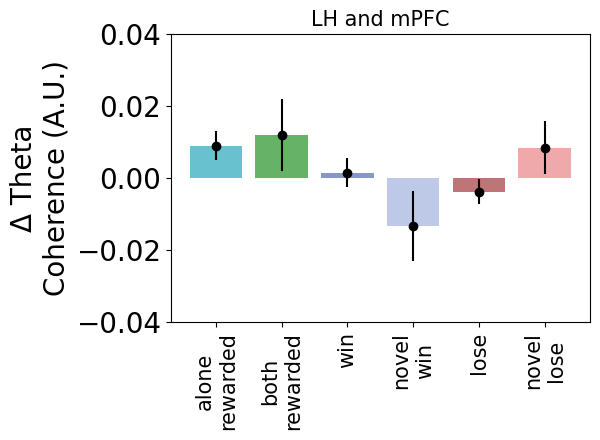

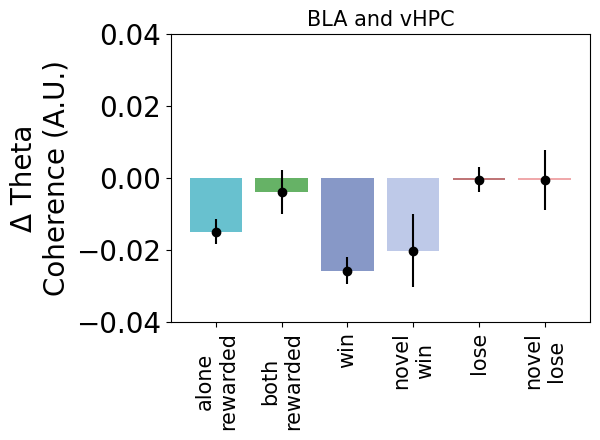

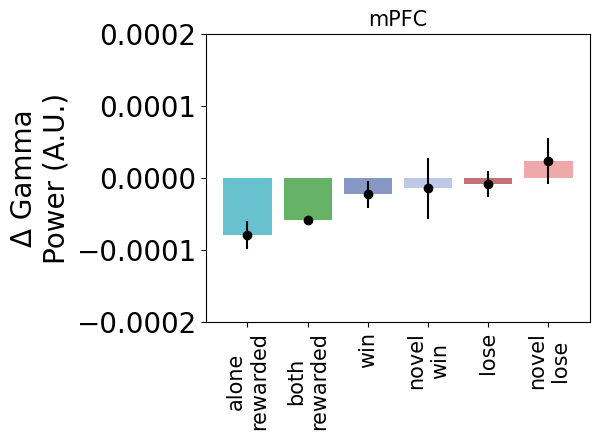

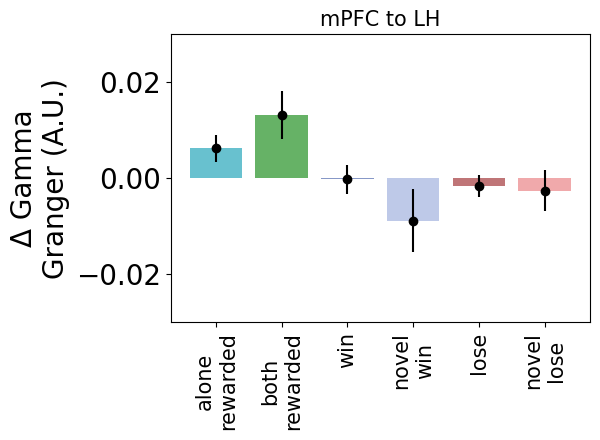

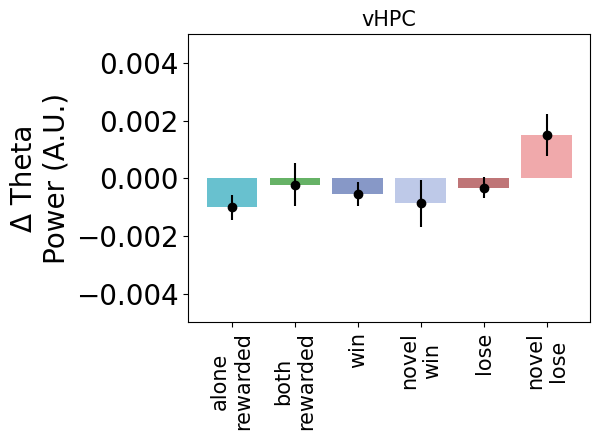

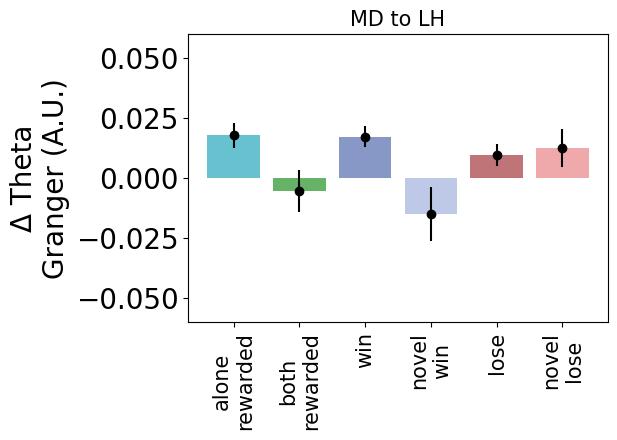

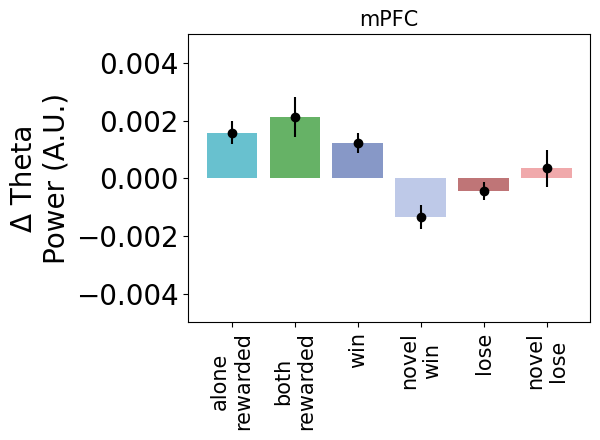

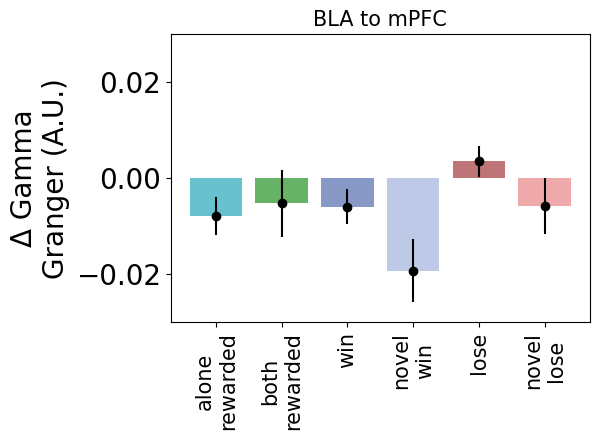

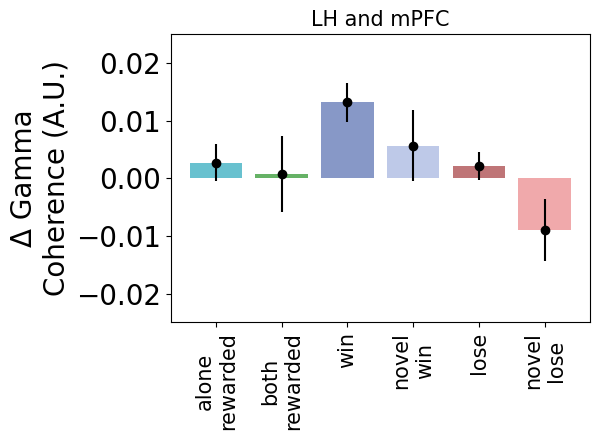

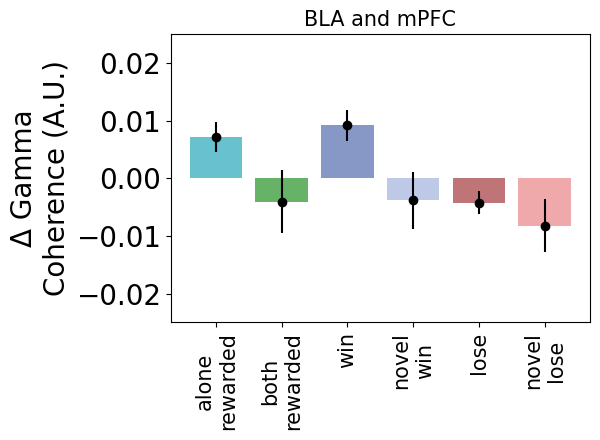

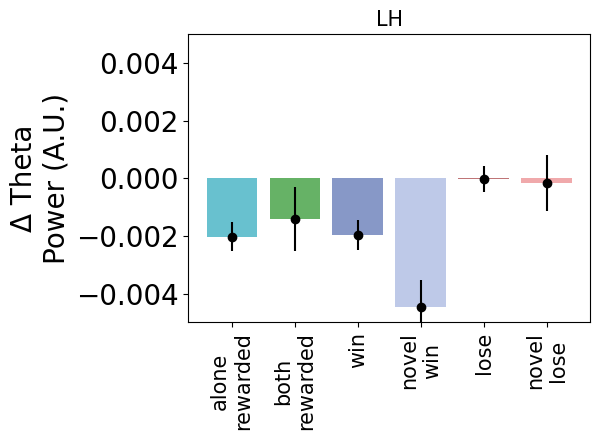

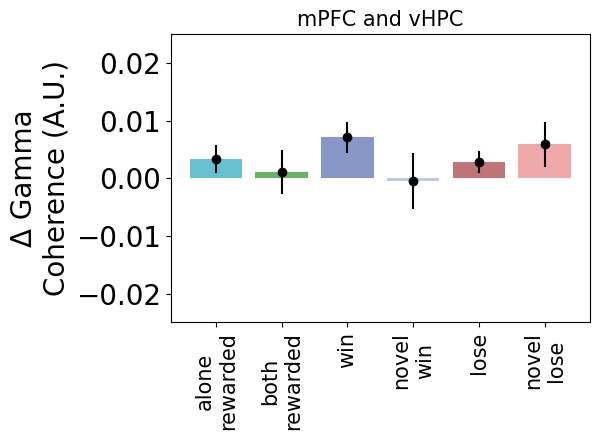

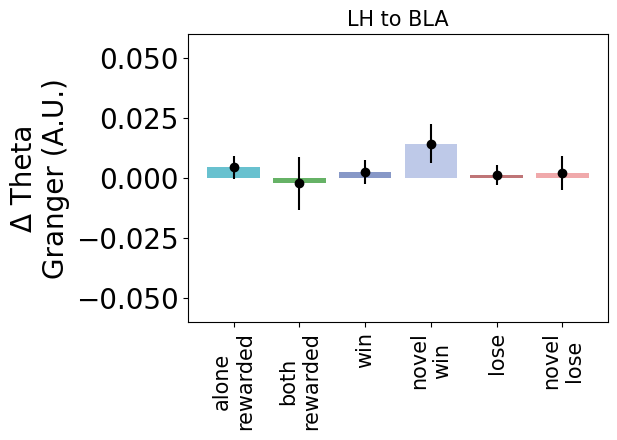

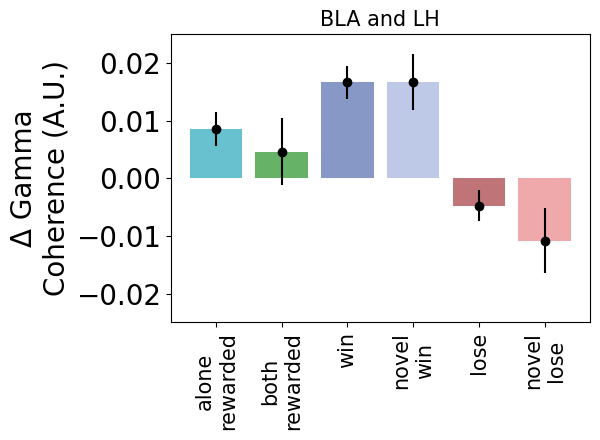

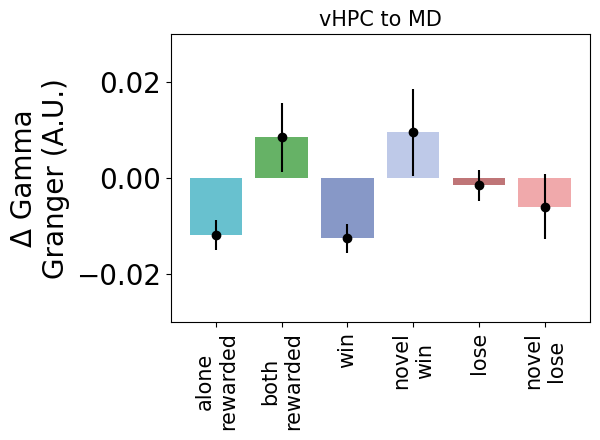

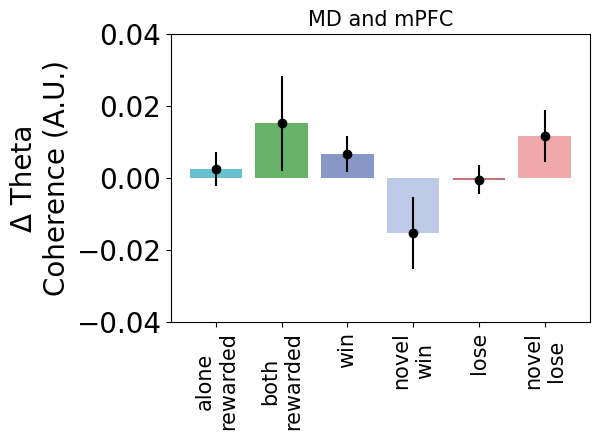

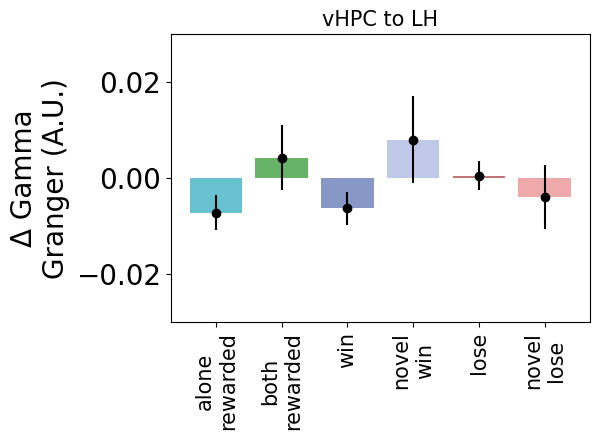

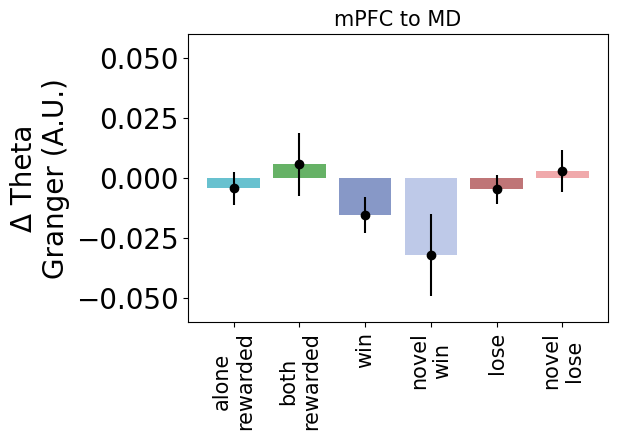

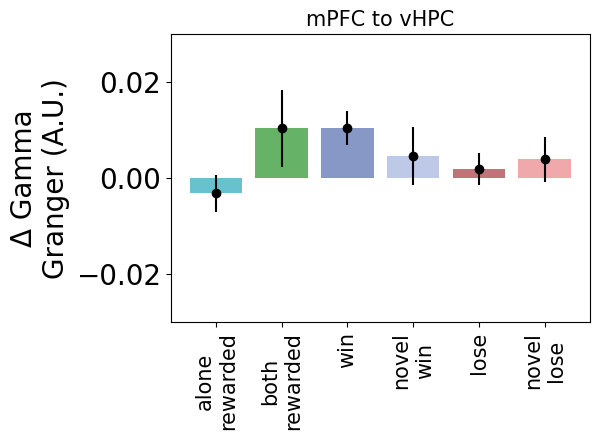

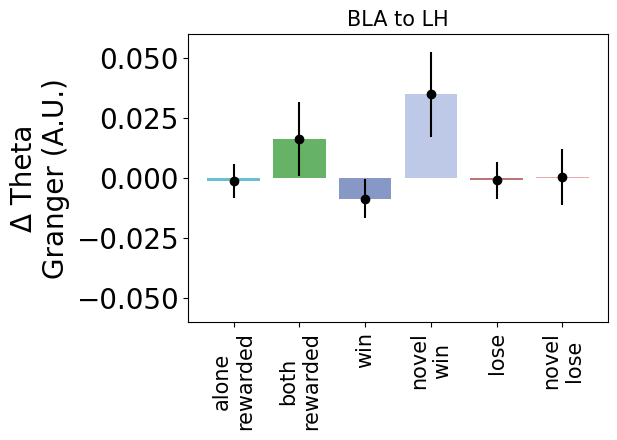

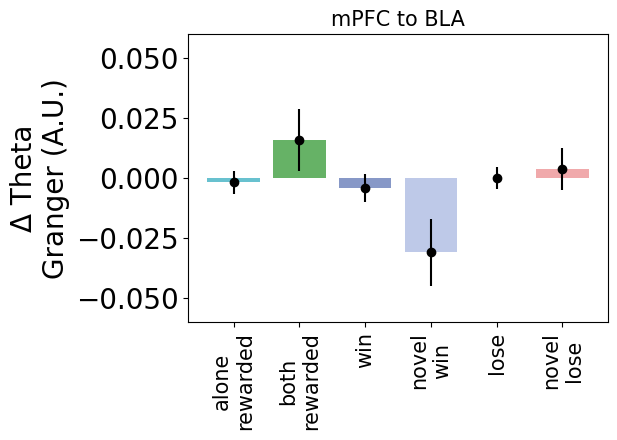

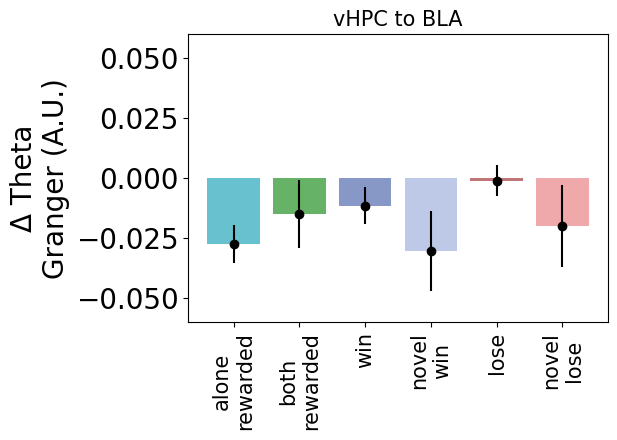

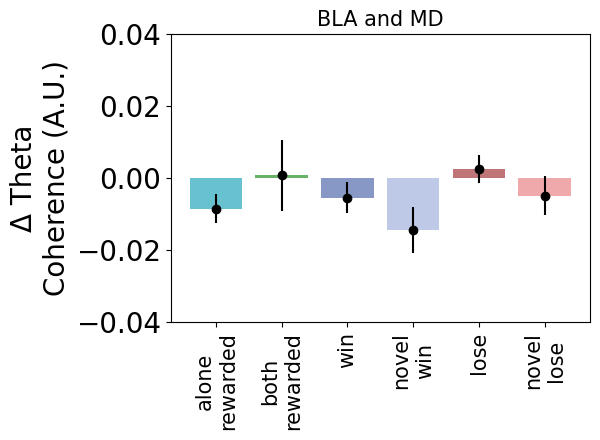

In [26]:
subj_df = LFP_SPECTRAL_DF.copy()
subj_df = subj_df[~subj_df["experiment_and_label"].str.contains("omission")]
all_group_df = []
for power_col in spectral_columns:
    band = power_col.split("_")[-1].capitalize()
    spectra = power_col.split("_")[-2].capitalize()
    brain_region = " and ".join(power_col.split("_")[:-2]).replace("-", " ")
    if "granger" in power_col:
        brain_region = brain_region.replace("and", "to")
    
    baseline_power_col = "baseline_{}".format(power_col)
    trial_power_col = "trial_{}".format(power_col)
    difference_power_col = "difference_{}".format(power_col)

    subj_df[baseline_power_col] = subj_df[baseline_power_col].apply(lambda x: np.nanmean(x))
    subj_df[trial_power_col] = subj_df[trial_power_col].apply(lambda x: np.nanmean(x))
    subj_df[difference_power_col] = subj_df[trial_power_col] - subj_df[baseline_power_col]

    # Calculate Q1, Q3 and IQR
    Q1 = subj_df[difference_power_col].quantile(0.25)
    Q3 = subj_df[difference_power_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Non-outlier values
    subj_df = subj_df[(subj_df[difference_power_col] >= lower_bound) & (subj_df[difference_power_col] <= upper_bound)]

    # Calculate group means
    # group_stats = subj_df.groupby('experiment_and_label')[difference_power_col].mean().reset_index()
    group_stats = subj_df.groupby('experiment_and_label').agg(
        Mean=(difference_power_col, lambda x: np.nanmean(x)),
        SEM=(difference_power_col, lambda x: np.nanstd(x)/(len(x)**0.5))
    ).reset_index()

    group_stats["color"] = group_stats['experiment_and_label'].map(OUTCOME_TO_COLOR)
    group_stats = group_stats.iloc[[0,1,5,4,2,3]]

    fig, ax = plt.subplots()
    plt.title("{}".format(brain_region), fontsize=15)
    # Plot the bar plot for group means
    plt.bar(group_stats['experiment_and_label'].apply(lambda x: x.replace("_", "\n")), group_stats["Mean"], color=group_stats["color"], alpha=0.6, label='Group Mean')
    plt.errorbar(group_stats['experiment_and_label'].apply(lambda x: x.replace("_", "\n")), group_stats["Mean"], yerr = group_stats['SEM'], fmt ='o', color="black")
    
    # plt.legend(fontsize=10)
    plt.ylabel("Δ {}\n{} (A.U.)".format(band, spectra))
    plt.xticks(rotation=90, fontsize=15)
    plt.ylim(spectral_band_to_ylim[spectra.lower()][band.lower()][0], spectral_band_to_ylim[spectra.lower()][band.lower()][1])
    plt.tight_layout()

#     for group in subj_df['experiment_and_label'].unique():
#         # Get individual data points for this group
#         group_data = subj_df[subj_df['experiment_and_label'] == group]
#         plt.scatter([group] * len(group_data), group_data[difference_power_col], color='darkblue', edgecolor='black', zorder=2)

    if "granger" in power_col:
        plt.savefig("./proc/plots/difference_bars/granger/{}_differences_bar.png".format(power_col))
        plt.savefig("./proc/plots/difference_bars/granger/{}_differences_bar.svg".format(power_col))
    elif "coherence" in power_col:
        plt.savefig("./proc/plots/difference_bars/coherence/{}_differences_bar.png".format(power_col))
        plt.savefig("./proc/plots/difference_bars/coherence/{}_differences_bar.svg".format(power_col))
    elif "power" in power_col:
        plt.savefig("./proc/plots/difference_bars/power/{}_differences_bar.png".format(power_col))
        plt.savefig("./proc/plots/difference_bars/power/{}_differences_bar.svg".format(power_col))

    plt.show()
    
    group_stats["spectra"] = spectra
    group_stats["band"] = band
    group_stats["brain_region"] = brain_region
    all_group_df.append(group_stats)





In [27]:
concatted_group_df = pd.concat(all_group_df)

In [28]:
concatted_group_df["region_1"] = concatted_group_df["brain_region"].apply(lambda x: x.replace(" and ", "_").replace(" to ", "_").split("_")[0])
concatted_group_df["region_2"] = concatted_group_df["brain_region"].apply(lambda x: x.replace(" and ", "_").replace(" to ", "_").split("_")[-1])


alone_rewarded Granger Gamma


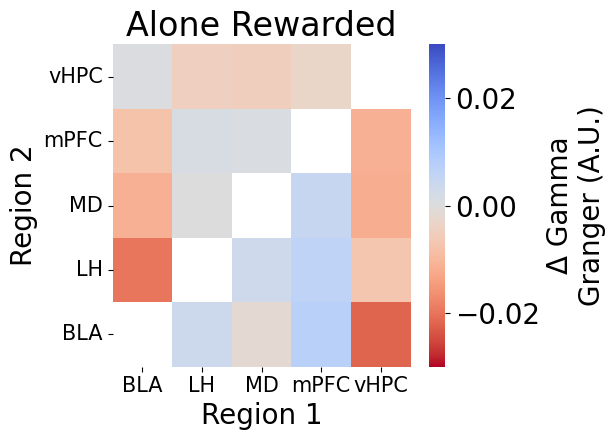

alone_rewarded Granger Theta


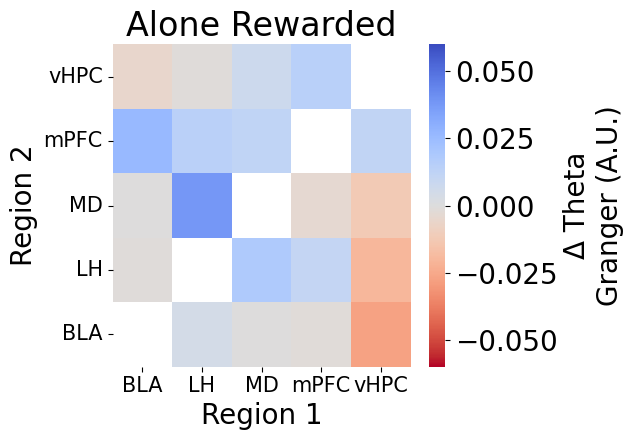

alone_rewarded Power Gamma


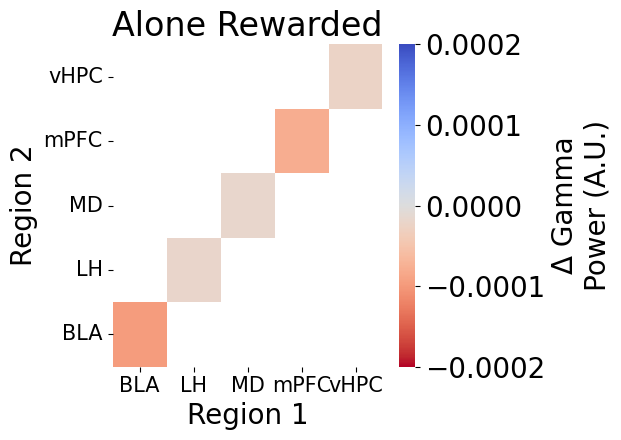

alone_rewarded Power Theta


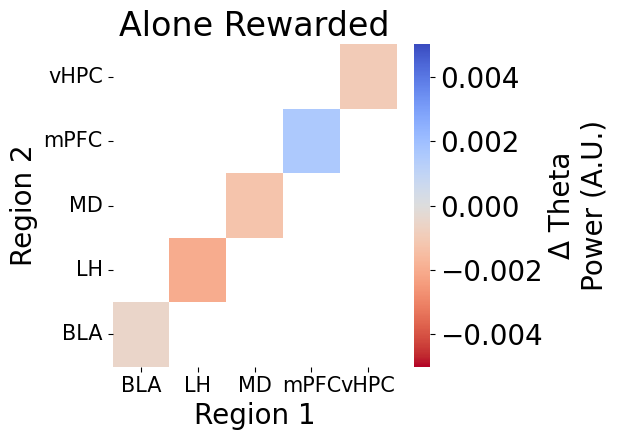

alone_rewarded Coherence Gamma


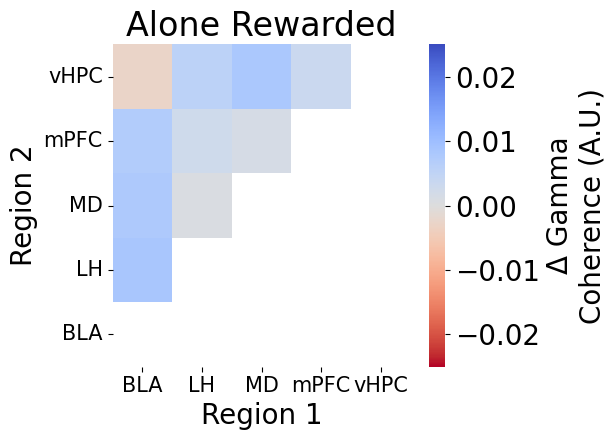

alone_rewarded Coherence Theta


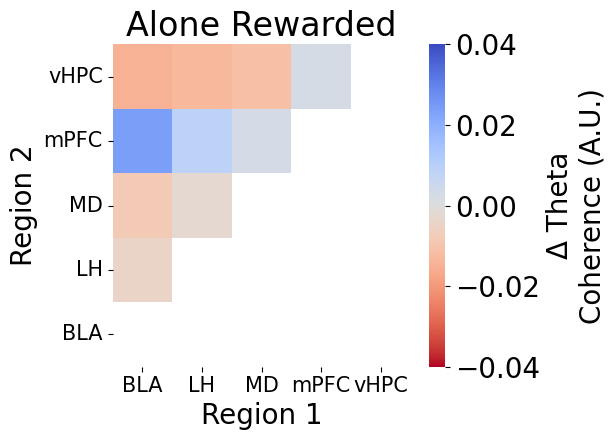

both_rewarded Granger Gamma


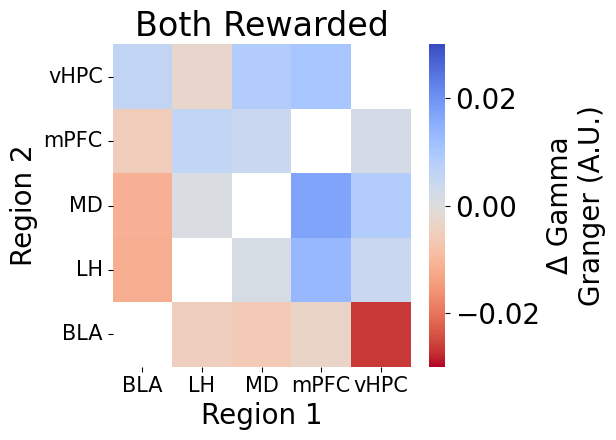

both_rewarded Granger Theta


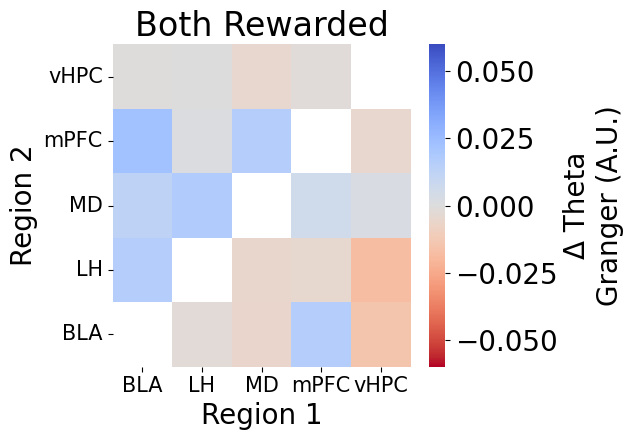

both_rewarded Power Gamma


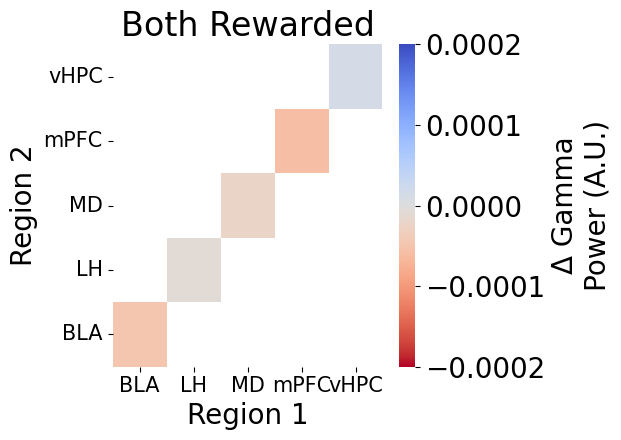

both_rewarded Power Theta


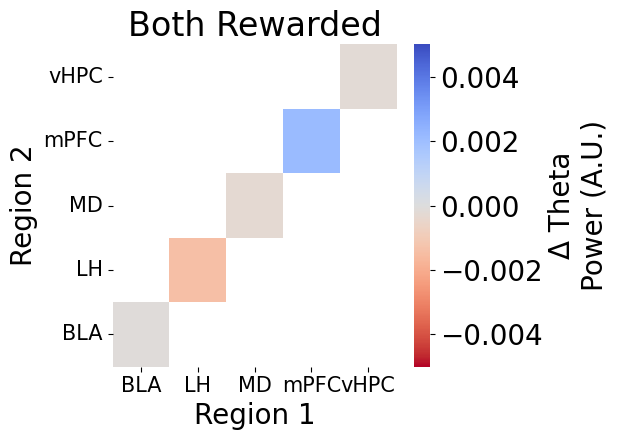

both_rewarded Coherence Gamma


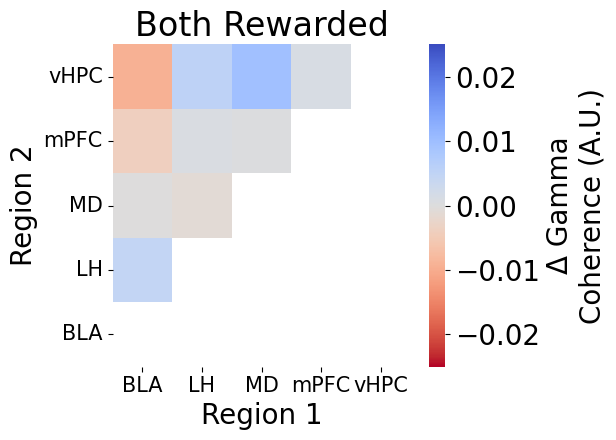

both_rewarded Coherence Theta


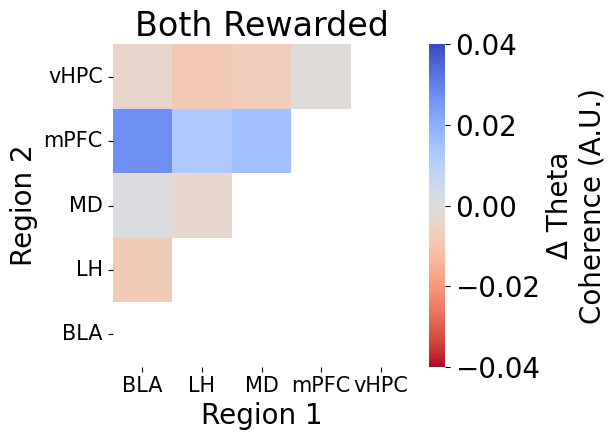

win Granger Gamma


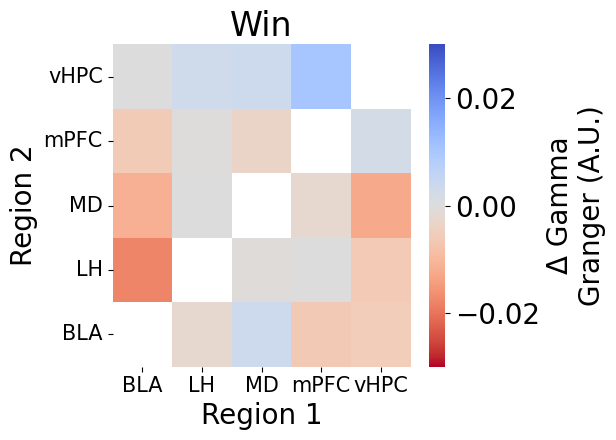

win Granger Theta


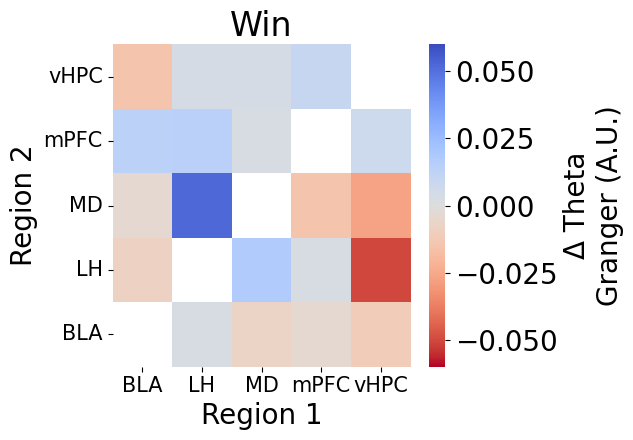

win Power Gamma


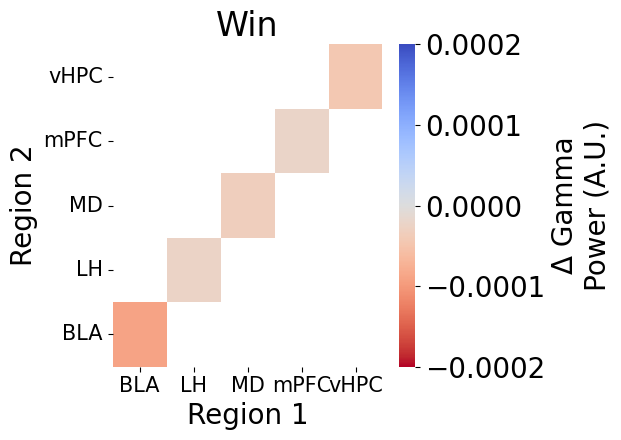

win Power Theta


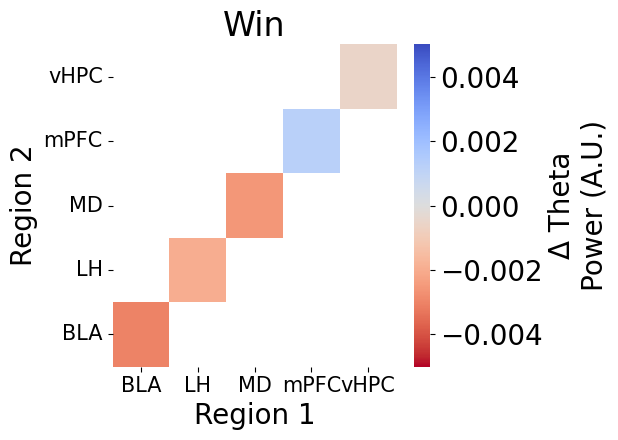

win Coherence Gamma


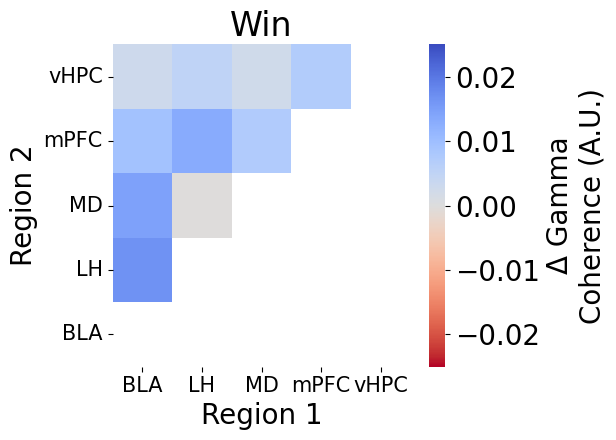

win Coherence Theta


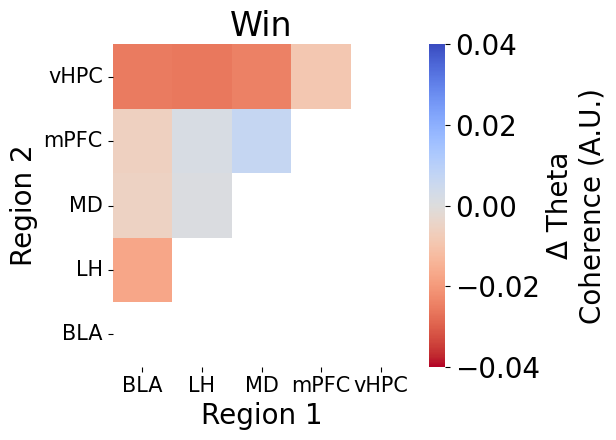

novel_win Granger Gamma


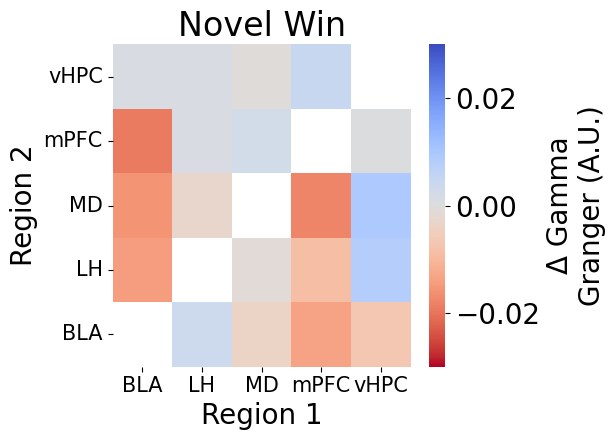

novel_win Granger Theta


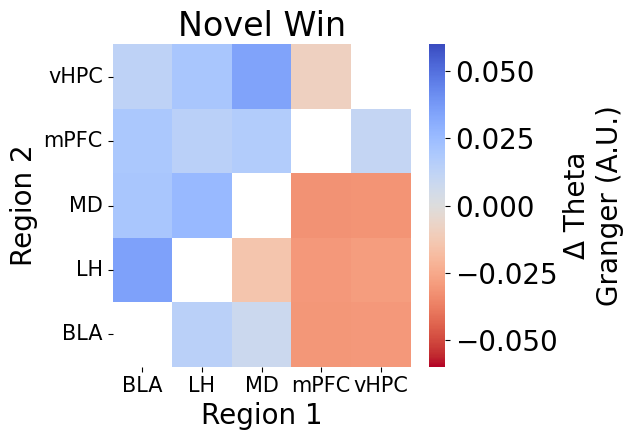

novel_win Power Gamma


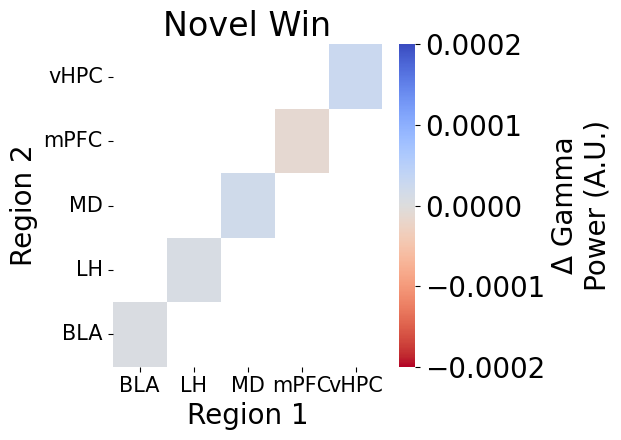

novel_win Power Theta


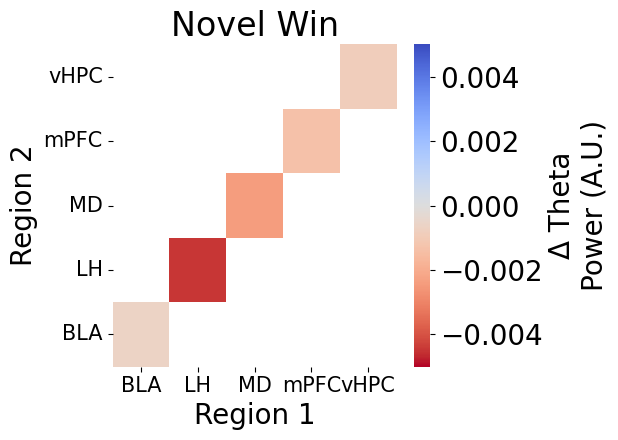

novel_win Coherence Gamma


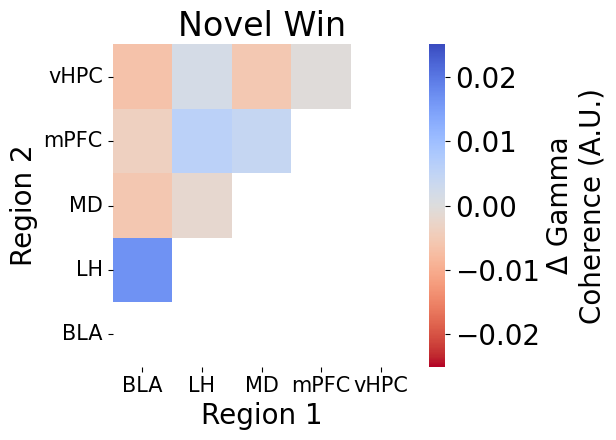

novel_win Coherence Theta


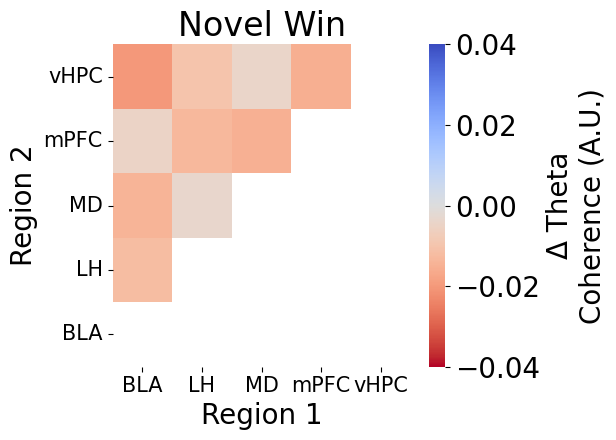

lose Granger Gamma


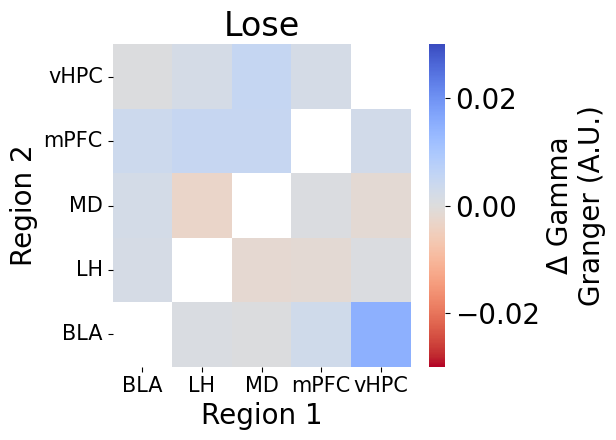

lose Granger Theta


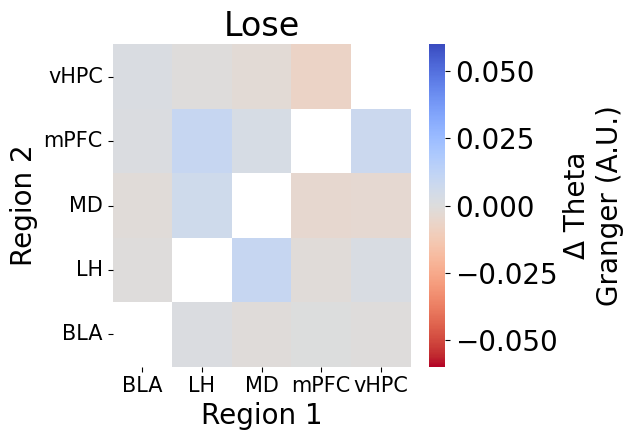

lose Power Gamma


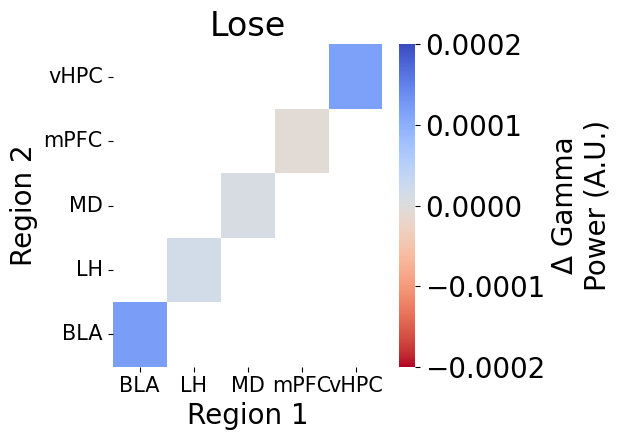

lose Power Theta


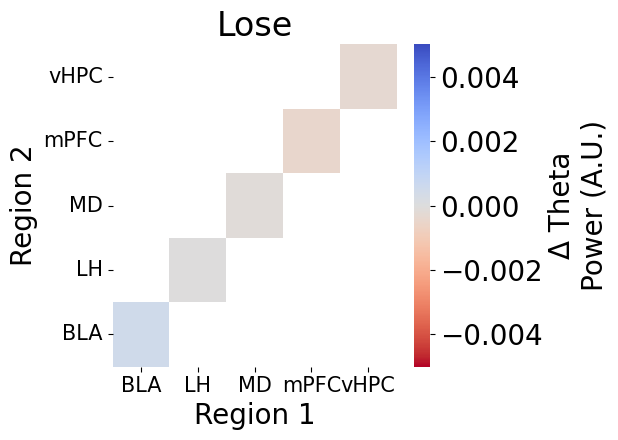

lose Coherence Gamma


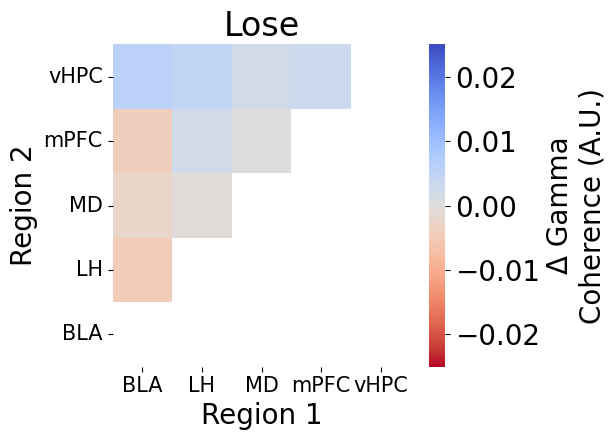

lose Coherence Theta


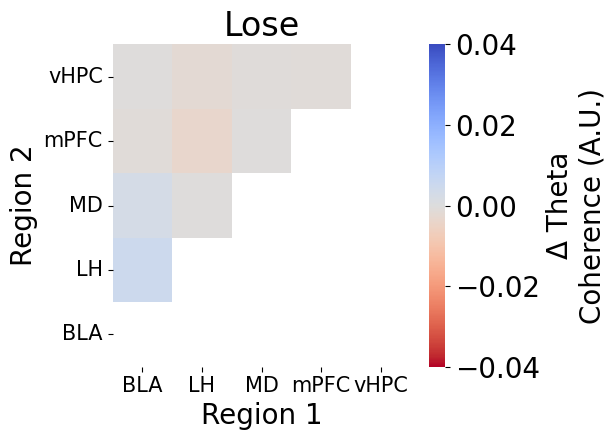

novel_lose Granger Gamma


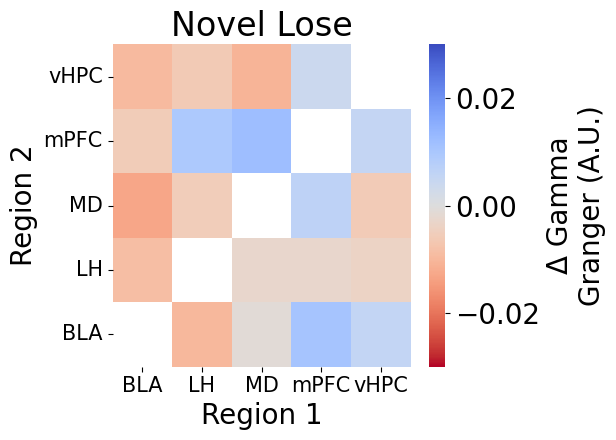

novel_lose Granger Theta


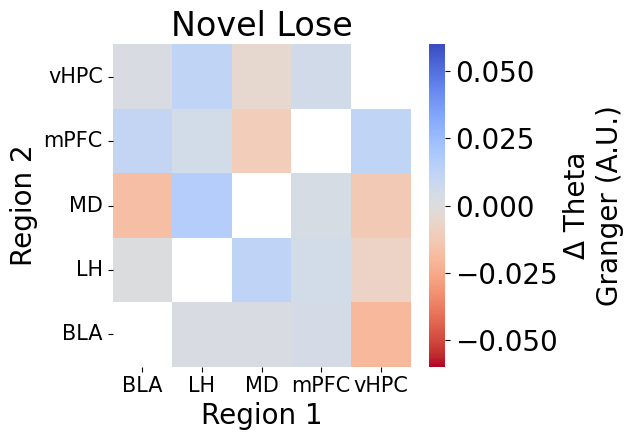

novel_lose Power Gamma


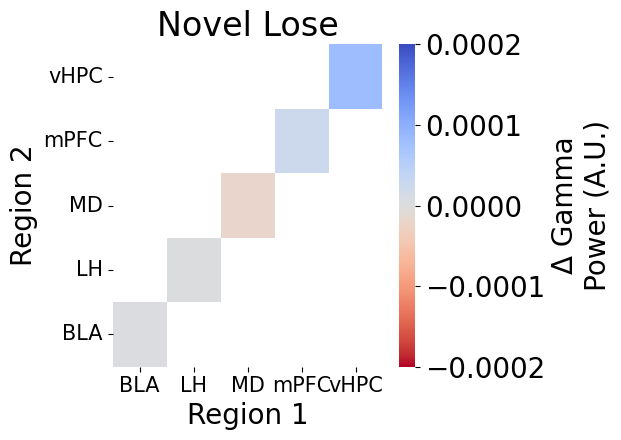

novel_lose Power Theta


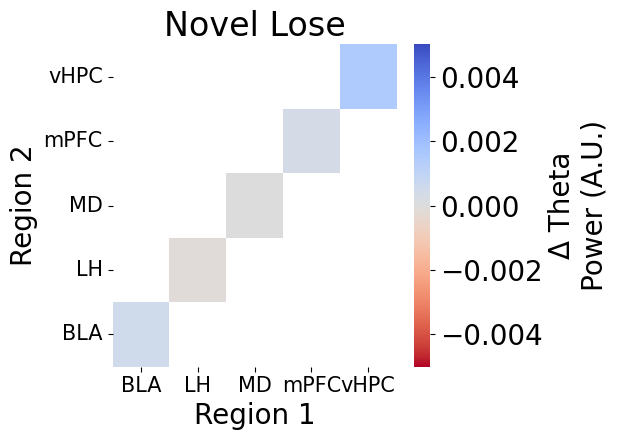

novel_lose Coherence Gamma


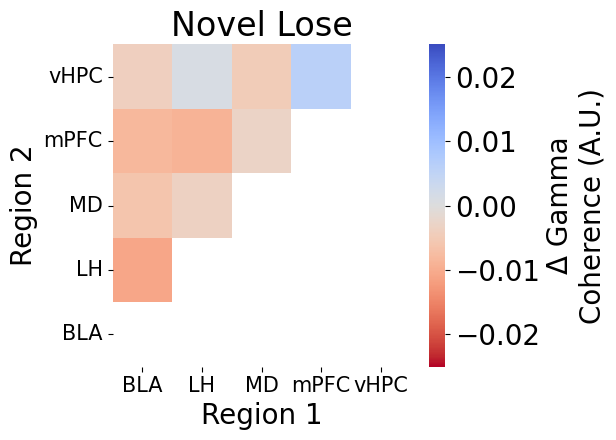

novel_lose Coherence Theta


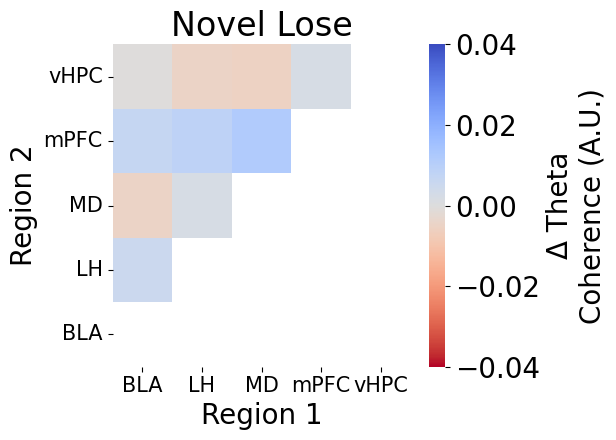

In [29]:
for label, spectra, band in product(concatted_group_df["experiment_and_label"].unique(), concatted_group_df["spectra"].unique(),  concatted_group_df["band"].unique()):
    print(label, spectra, band)
    current_df = concatted_group_df[(concatted_group_df["experiment_and_label"] == label) & (concatted_group_df["spectra"] == spectra) & (concatted_group_df["band"] == band)]
    
    if "Coherence" in spectra:
        another_df = current_df.copy()
        another_df["region_1"], another_df["region_2"] = another_df["region_2"], another_df["region_1"]
        another_df["Mean"] = np.nan
        current_df = pd.concat([current_df, another_df]).reset_index()
    elif "power" in spectra:
        continue
    current_df["Mean"] = current_df["Mean"].astype(float)
    current_df = current_df.sort_values(by=["region_1", "region_2"])


    
    # pivoted_df = current_df.pivot(index=['region_1'], columns=['region_2'], values='Mean')
    pivoted_df = current_df.pivot(index='region_2', columns='region_1', values='Mean')
    pivoted_df = pivoted_df.sort_values("region_2", ascending=False)
    
    # pivoted_df = pd.pivot_table(current_df, values="Mean", index=['region_1'], columns=['region_2'])
    
    fig, ax = plt.subplots()
    plt.title("{}".format(label.replace("_", " ").title()))
    sns.heatmap(pivoted_df, cmap='coolwarm_r', center=0, cbar_kws={'label': "Δ {}\n{} (A.U.)".format(band, spectra)}, vmin=spectral_band_to_ylim[spectra.lower()][band.lower()][0], vmax= spectral_band_to_ylim[spectra.lower()][band.lower()][1])
    plt.ylabel("Region 2")
    plt.xlabel("Region 1")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.savefig("./proc/plots/difference_heatmaps/svg/{}_{}_{}_differences_heatmap.svg".format(spectra, band, label).lower())
    plt.savefig("./proc/plots/difference_heatmaps/png/{}_{}_{}_differences_heatmap.png".format(spectra, band, label).lower())

    plt.show()
   

